**Concatenates Multiples attacks in one single csv**

**INFO**
    * 
        Timestamp : recorded time (s)

        CAN ID : identifier of CAN message in HEX (ex. 043f)

        DLC : number of data bytes, from 0 to 8

        DATA[0~7] : data value (byte)

        Flag : T or R, T represents injected message while R represents normal message
    *

In [5]:
#import pandas as pd
#import os 
#files = os.listdir("N:/AI_ML_RL/CAN_Dataset/9) Car-Hacking Dataset")
#columns = ['Timestamp', 'CAN ID', 'DLC', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]', 'Flag','TYPE']
#dataframes = []
#for file in files:
#    if file.endswith('csv'):
#        df = pd.read_csv(file)
#        df['attack'] = file.split('_')[0]
#        df.columns = columns
#        print(df.shape)
#        dataframes.append(df)
#combined_df = pd.concat(dataframes,ignore_index=False, axis=0)
#combined_df.to_csv('CleanedData_CAN.csv',index=False)

***Clean the normal data from TXT file to a CSV file with correct schema***

In [6]:
#import pandas as pd
#import numpy as np
## Define a function to parse a single line of CAN bus data
#def parse_can_message(line):
#    # Split the line into components
#    components = line.strip().split()
#
#    # Check if the line has the expected number of components
#    if len(components) < 9:
#        print(f"Skipping line: {line.strip()} (not enough components)")
#        return None
#
#    # Extract the relevant information
#    timestamp = float(components[1].replace('Timestamp:', ''))
#    message_id = components[3]
#    dlc = int(components[6].replace('DLC:', ''))
#    data_bytes = components[7:]
#
#    # Convert data bytes from hexadecimal to a list of integers
#    if len(data_bytes) < 8:
#        print(f"Skipping line: {line.strip()} (insufficient data bytes)")
#        return None
#    
#    data = [int(byte, 16) for byte in data_bytes]
#    # Return the parsed data as a dictionary or a custom data structure
#    can_message = {
#        'Timestamp': timestamp,
#        'CAN ID': message_id,
#        'DLC': dlc,
#        'DATA[0]':data[0]if len(data) > 0 else np.nan,
#        'DATA[1]':data[1]if len(data) > 0 else np.nan, 
#        'DATA[2]':data[2]if len(data) > 0 else np.nan, 
#        'DATA[3]':data[3]if len(data) > 0 else np.nan,
#        'DATA[4]':data[4]if len(data) > 0 else np.nan, 
#        'DATA[5]':data[5]if len(data) > 0 else np.nan, 
#        'DATA[6]':data[6]if len(data) > 0 else np.nan, 
#        'DATA[7]':data[7]if len(data) > 0 else np.nan
#    }
#    return can_message
#
#dataframe = []
## Open the file for reading
#input_file_path = 'normal_run_data.txt'  
#output_csv_path='normal_data_cleaned.csv'
#
##read from a file TXT without schema to csv file with schema csv
#with open(input_file_path, 'r') as input_file:
#    can_messages = [parse_can_message(line) for line in input_file if parse_can_message(line) is not None]
#
## Create a DataFrame from the parsed data
#df = pd.DataFrame(can_messages)
#df['Flag']='R'
#df['TYPE']='NORMAL'
#df.to_csv(output_csv_path)
#

**Import both datasets 'Normal' and 'Acttacks'**

In [7]:
import pandas as pd

attacks = pd.read_csv('CleanedData_CAN.csv')
normal = pd.read_csv('Normal_data_Cleande.csv')

***Cleaning the dataset***
    **Flag : T or R, T represents injected message while R represents normal message (T = 1,R = 0)**


In [8]:
FlagEconding = {
    'R':0,
    'T':1
}
#TYPE_mapping = {TYPE: i for i, TYPE in enumerate(data['TYPE'].unique())} for creating this dic
'''
    1.    DoS Attack 

    2.    Fuzzy Attack 

    3.    Spoofing the drive gear 

    4.    Spoofing the RPM gauge

    5.    Attack-free (normal)
'''
TypeEnconding = {
    'DoS': 0,
    'Fuzzy': 1, 
    'gear': 2, 
    'RPM': 3,
    'NORMAL':4
    }
#Binary encoding to 'TYPE' and 'FLAG' columns in attacks.
for col in attacks.columns:
    attacks[col]=attacks[col].replace(TypeEnconding)
    attacks[col]=attacks[col].replace(FlagEconding)

    normal[col]=normal[col].replace(TypeEnconding)
    normal[col]=normal[col].replace(FlagEconding)


print('attacks:' ,attacks.shape)
print('normal:' ,normal.shape)

attacks: (16569471, 13)
normal: (928136, 14)


In [9]:
#Convert hex values to int values
def convert_to_decimal(value):
    if isinstance(value, str):  # Check if the value is a string
        try:
            decimal_value = int(value, 16)
            return decimal_value
        except ValueError:
            pass
    return value

#Iterate in each column
for col in attacks.columns:
    attacks[col] = attacks[col].apply(convert_to_decimal)
    attacks[col].interpolate(method='nearest', inplace=True)

    normal[col] = normal[col].apply(convert_to_decimal)
    normal[col].interpolate(method='nearest', inplace=True)

print(attacks.head(5))
print(normal.head(5))

      Timestamp  CAN ID  DLC  DATA[0]  DATA[1]  DATA[2]  DATA[3]  DATA[4]  \
0  1.478198e+09     399    8      254       91        0      0.0      0.0   
1  1.478198e+09     608    8       25       33       34     48.0      8.0   
2  1.478198e+09     672    8      100        0      154     29.0    151.0   
3  1.478198e+09     809    8       64      187      127     20.0     17.0   
4  1.478198e+09    1349    8      216        0        0    138.0      0.0   

   DATA[5]  DATA[6]  DATA[7]  Flag  TYPE  
0     60.0      0.0      0.0   0.0     0  
1    142.0    109.0     58.0   0.0     0  
2      2.0    189.0      0.0   0.0     0  
3     32.0      0.0     20.0   0.0     0  
4      0.0      0.0      0.0   0.0     0  
   Unnamed: 0     Timestamp  CAN ID  DLC  DATA[0]  DATA[1]  DATA[2]  DATA[3]  \
0           0  1.479121e+09     848    8        5       40      132      102   
1           1  1.479121e+09     704    8       20        0        0        0   
2           2  1.479121e+09    1072    

**Search for 'NULL' and 'NAN' values in both datasets**

In [10]:
null_attacks={}
nan_attacks ={}

null_normal={}
nan_normal ={}

for col in attacks.columns:
    #for attacks dataframe
    null_attacks[col]=((attacks[col].isnull()).sum())
    nan_attacks[col]=((attacks[col].isna()).sum())
    #for normal dataframe
    null_normal[col]=((normal[col].isnull()).sum())
    nan_normal[col]=((normal[col].isna()).sum())

print('Nan_attacks values:',nan_attacks)
print('Null_attacks values:',null_attacks)
print('\nNan_normal values:',nan_normal)
print('Null_normal values:',null_normal)

Nan_attacks values: {'Timestamp': 0, 'CAN ID': 0, 'DLC': 0, 'DATA[0]': 0, 'DATA[1]': 0, 'DATA[2]': 0, 'DATA[3]': 0, 'DATA[4]': 0, 'DATA[5]': 0, 'DATA[6]': 0, 'DATA[7]': 0, 'Flag': 0, 'TYPE': 0}
Null_attacks values: {'Timestamp': 0, 'CAN ID': 0, 'DLC': 0, 'DATA[0]': 0, 'DATA[1]': 0, 'DATA[2]': 0, 'DATA[3]': 0, 'DATA[4]': 0, 'DATA[5]': 0, 'DATA[6]': 0, 'DATA[7]': 0, 'Flag': 0, 'TYPE': 0}

Nan_normal values: {'Timestamp': 0, 'CAN ID': 0, 'DLC': 0, 'DATA[0]': 0, 'DATA[1]': 0, 'DATA[2]': 0, 'DATA[3]': 0, 'DATA[4]': 0, 'DATA[5]': 0, 'DATA[6]': 0, 'DATA[7]': 0, 'Flag': 0, 'TYPE': 0}
Null_normal values: {'Timestamp': 0, 'CAN ID': 0, 'DLC': 0, 'DATA[0]': 0, 'DATA[1]': 0, 'DATA[2]': 0, 'DATA[3]': 0, 'DATA[4]': 0, 'DATA[5]': 0, 'DATA[6]': 0, 'DATA[7]': 0, 'Flag': 0, 'TYPE': 0}


**Scale the data in both dataframes with scaller from sklearn to a specific colomns**

In [17]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler
scaler = StandardScaler()
columns=['Timestamp', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']
# Fit the scaler to your data and transform the data
normalized_data_attacks = scaler.fit_transform(attacks[columns])
normalized_data_normal = scaler.fit_transform(normal[columns])
#Convert scaller object to dataframe
normalized_df_attacks = pd.DataFrame(normalized_data_attacks, columns=columns)
normalized_df_normal =  pd.DataFrame(normalized_data_normal, columns=columns)

normalized_df_attacks['Flag'] = attacks['Flag']
normalized_df_attacks['TYPE'] = attacks['TYPE']
normalized_df_attacks['CAN ID'] = attacks['CAN ID']
normalized_df_attacks['DLC'] = attacks['DLC']

normalized_df_normal['Flag'] = normal['Flag']
normalized_df_normal['TYPE'] = normal['TYPE']
normalized_df_normal['CAN ID'] = normal['CAN ID']
normalized_df_normal['DLC'] = normal['DLC']

In [18]:
print(normalized_df_attacks.head(5))
print(normalized_df_normal.head(5))

   Timestamp   DATA[0]   DATA[1]   DATA[2]   DATA[3]   DATA[4]   DATA[5]  \
0   0.535105  2.180724  0.835043 -0.685816 -0.768567 -0.705168 -0.019682   
1   0.535105 -0.367711 -0.229994 -0.103382 -0.299023 -0.596358  1.041575   
2   0.535105  0.466930 -0.835963  1.952265 -0.484884  1.348609 -0.770328   
3   0.535105  0.066302  2.597863  1.489745 -0.572924 -0.473948 -0.382063   
4   0.535105  1.757840 -0.835963 -0.685816  0.581373 -0.705168 -0.796212   

    DATA[6]   DATA[7]  Flag  TYPE  CAN ID  DLC  
0 -0.458830 -0.675061   0.0     0     399    8  
1  1.436912  0.047799   0.0     0     608    8  
2  2.828283 -0.675061   0.0     0     672    8  
3 -0.458830 -0.425799   0.0     0     809    8  
4 -0.458830 -0.675061   0.0     0    1349    8  
   Timestamp   DATA[0]   DATA[1]   DATA[2]   DATA[3]   DATA[4]   DATA[5]  \
0  -1.732032 -0.680564 -0.185456  1.455176  0.327787  0.583318 -0.831826   
1  -1.732031 -0.524430 -0.861074 -0.674374 -0.750359 -0.676213 -0.831826   
2  -1.732027 -0.73260

***Save both dataframes to a CSV files***

In [19]:
normalized_df_attacks.to_csv('NormalizedData_CAN_attacks.csv',index=False)
normalized_df_normal.to_csv('NormalizedData_CAN_normal.csv',index=False)

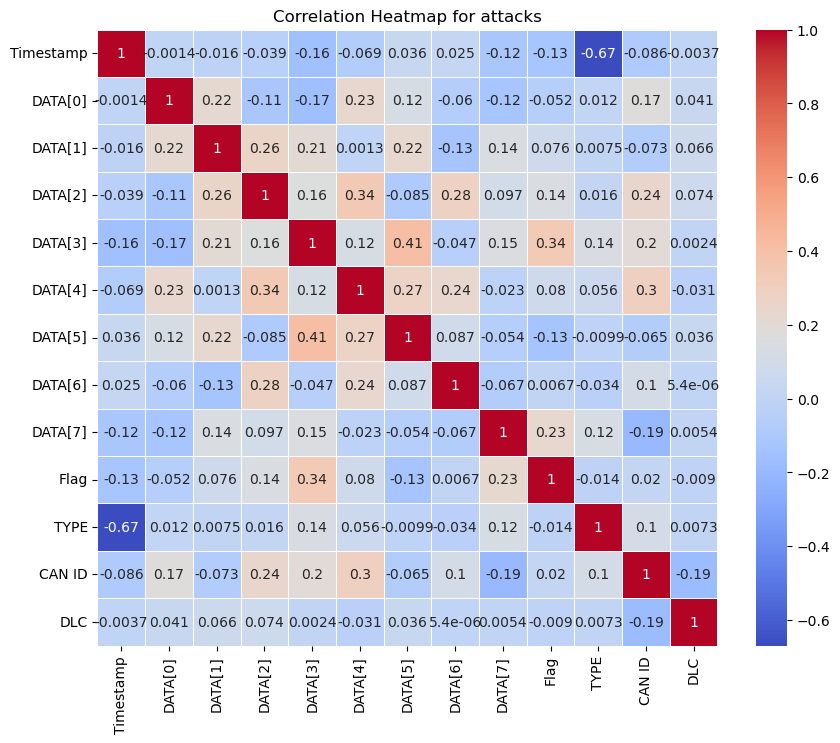

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = normalized_df_attacks.corr()  
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for attacks')
plt.show()

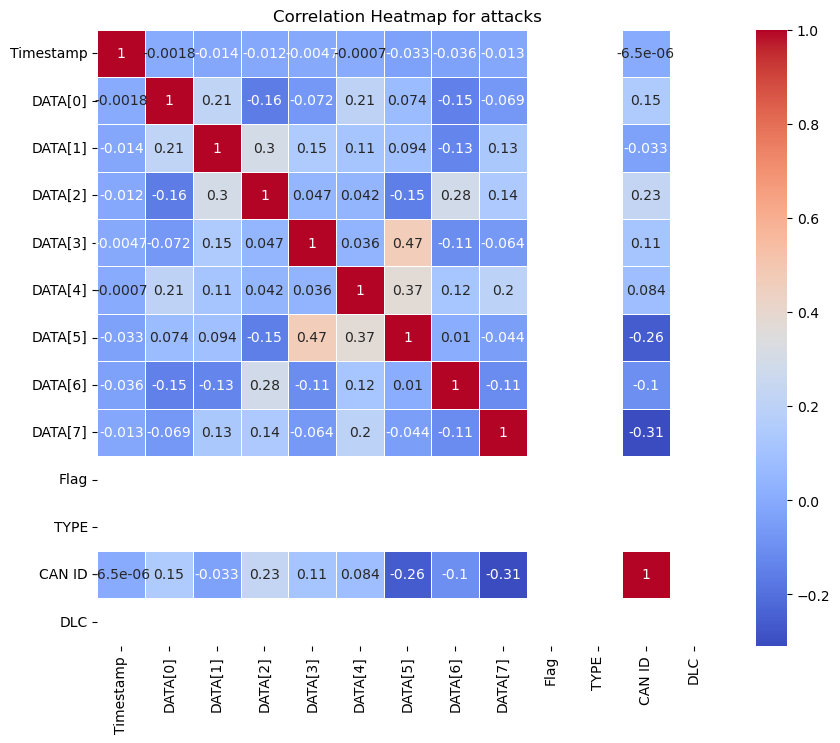

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = normalized_df_normal.corr()  
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for attacks')
plt.show()